### Final Dataset Development (Market Data OHLCV + TA + Textual Data + Macroeconomics Data)

#### Train and Test Splits

**OHLCV Data:**

- From `Enfoque` and `Nelogica` (2017/04 - 2022/07)
  - 1-min time-bars
    - Resampled to Daily and Hourly data


**Technical Indicators:**

- From `ta_lib`
  - SMAs
  - EMAs
  - RSI
  - ADX
  - MACD
  - BBANDS
  - OBV

**Textual Data:**

- From `Suno Research`
  - Sentiments - Resample Daily - #News x News Count (Shift 1 Day - Avoid Lookahead Bias)
- From `Twitter`
  - Sentiments - Resample Daily - #Tweets x RTs + Favorite Counts (Shift 1 Day - Avoid lookahead bias)

**Macroeconomics Data:**

- From `Banco Central`
  - Selic
  - IPCA

In [92]:
import pandas as pd

In [93]:
ticker: str = 'VALE3'
start_dt: str = '2018-01-01'
end_dt: str = '2022-07-02'

### Macroeconomics Data - Selic

In [94]:
selic = pd.read_csv('./macro/selic.csv', sep=';')
selic.rename(columns={'value': 'selic'}, inplace=True)
selic['selic'] = selic['selic'] * 100 * 252

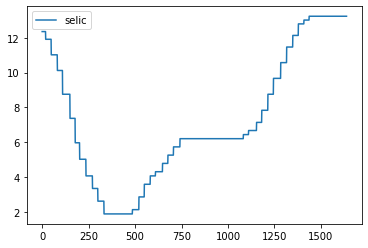

In [95]:
selic.plot();

In [96]:
selic.head()

,date,selic
0,2022-07-13,12.357324
1,2022-07-12,12.357324
2,2022-07-11,12.357324
3,2022-07-08,12.357324
4,2022-07-07,12.357324


### Macroeconomics Data - IPCA

In [97]:
ipca = pd.read_csv('./macro/ipca_daily.csv', sep=';')
ipca.rename(columns={'value': 'ipca'}, inplace=True)

In [98]:
ipca.tail()

,date,ipca
1607,2022-06-27,11.89
1608,2022-06-28,11.89
1609,2022-06-29,11.89
1610,2022-06-30,11.89
1611,2022-07-01,11.89


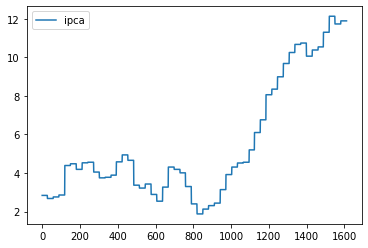

In [99]:
ipca.plot();

### Textual Data - News (Suno Research)

In [100]:
df_text_news = pd.read_csv(f'./textual/news/suno_daily_sent_scores_{ticker.upper()}.csv')
df_text_news.rename(columns={'sent_score': 'sent_score_news'}, inplace=True)
df_text_news

,date,sent_score_news
0,2018-08-28,0
1,2018-08-29,0
2,2018-08-30,0
3,2018-08-31,0
4,2018-09-01,0
...,...,...
1399,2022-06-27,0
1400,2022-06-28,0
1401,2022-06-29,0
1402,2022-06-30,0


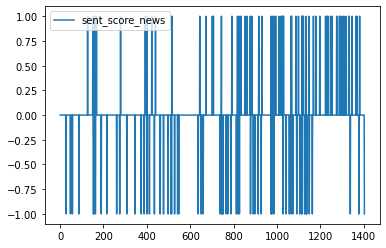

In [101]:
df_text_news.plot();

### Textual Data - Twitter

In [102]:
try:
    df_text_twitter = pd.read_csv(f'./textual/twitter/twitter_daily_sent_scores_{ticker.upper()}.csv')
    df_text_twitter.rename(columns={'sent_score': 'sent_score_twitter'}, inplace=True)
except:
    # Case when no Twitter Data is Available
    df_text_twitter = df_text_news.copy()
    df_text_twitter.rename(columns={'sent_score_news': 'sent_score_twitter'}, inplace=True)
    df_text_twitter['sent_score_twitter'] = 0

<AxesSubplot:>

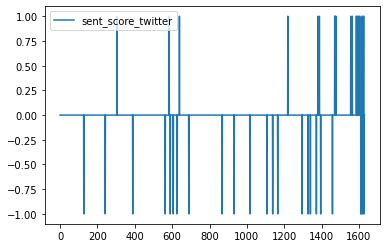

In [103]:
df_text_twitter.plot()

### Market Data and Technical Indicators

#### Train Split

In [104]:
df_market_ta = pd.read_csv(f'./market/ohlcv_daily_TA/train/{ticker.upper()}_train.csv')
df_market_ta

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ma_10,ma_20,ema_5,ema_10,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume
0,2018-01-02,30.177663,31.095529,30.177663,31.080605,10817200.0,29.856783,29.991105,29.797084,29.946331,...,29.190354,27.879528,30.044795,29.286333,28.239276,0.010690,0.036163,0.012691,0.037177,1.134274
1,2018-01-03,31.214927,31.252238,30.819423,31.065680,8940500.0,30.177663,31.095529,30.177663,31.080605,...,29.554862,28.130185,30.385090,29.609850,28.508457,0.033794,0.005027,0.021043,-0.000480,-0.014925
2,2018-01-04,31.200002,31.617893,31.117916,31.177615,15545000.0,31.214927,31.252238,30.819423,31.065680,...,29.863268,28.328019,30.649265,29.894898,28.762663,-0.000478,0.011632,0.009639,0.003597,0.111935
3,2018-01-05,31.020906,31.476108,30.826886,31.423872,10569700.0,31.200002,31.617893,31.117916,31.177615,...,30.192603,28.555544,30.907467,30.172894,29.016111,-0.005757,-0.004494,-0.009397,0.007867,0.246257
4,2018-01-08,31.640280,32.162643,31.640280,32.102944,11601300.0,31.020906,31.476108,30.826886,31.423872,...,30.514416,28.839207,31.305959,30.523812,29.310095,0.019770,0.021577,0.026044,0.021380,0.679072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2021-12-23,76.990070,77.095998,75.901905,76.190799,10599100.0,76.932291,77.182666,75.670791,76.922662,...,75.649605,72.768857,76.263504,75.341637,73.423452,0.000751,-0.001124,0.003050,-0.009560,-0.731863
985,2021-12-27,75.950054,76.508581,75.362638,76.306356,8992600.0,76.990070,77.095998,75.901905,76.190799,...,75.983758,73.285013,76.277788,75.517040,73.698014,-0.013601,-0.007648,-0.007130,0.001516,0.115557
986,2021-12-28,75.603382,75.622642,73.735205,73.956690,15200200.0,75.950054,76.508581,75.362638,76.306356,...,75.844127,73.634574,75.504089,75.233340,73.722650,-0.004575,-0.011647,-0.021831,-0.031277,-2.349666
987,2021-12-29,73.552240,75.093004,73.523350,74.515217,10070200.0,75.603382,75.622642,73.735205,73.956690,...,75.784422,74.004839,75.174465,75.102772,73.798133,-0.027505,-0.007028,-0.002877,0.007524,0.558527


In [105]:
# [Textual Data]

# News (Suno Research)
df_concat = pd.merge(df_market_ta, df_text_news, how='left', on='date').fillna(0)
# Twitter
df_concat = pd.merge(df_concat, df_text_twitter, how='left', on='date').fillna(0)

# [Macroeconomics Data]

# Selic
df_concat = pd.merge(df_concat, selic, how='inner', on='date')

# IPCA
df_concat = pd.merge(df_concat, ipca, how='inner', on='date')
df_concat

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume,sent_score_news,sent_score_twitter,selic,ipca
0,2018-02-01,31.043293,31.692516,31.020906,31.483571,13321800.0,31.155228,31.849225,31.073142,31.282088,...,31.068959,-0.003599,-0.004932,-0.001682,0.006420,0.201483,0.0,0.0,6.673212,2.84
1,2018-02-02,31.080605,31.080605,30.408995,30.692564,14189200.0,31.043293,31.692516,31.020906,31.483571,...,31.033112,0.001201,-0.019497,-0.019923,-0.025445,-0.791007,0.0,0.0,6.673212,2.84
2,2018-02-05,30.267211,31.371636,30.095577,30.923896,17078700.0,31.080605,31.080605,30.408995,30.692564,...,31.022710,-0.026519,0.009320,-0.010360,0.007509,0.231332,0.0,0.0,6.673212,2.84
3,2018-02-06,30.229899,31.416410,30.073190,31.371636,17165600.0,30.267211,31.371636,30.095577,30.923896,...,31.055941,-0.001234,0.001426,-0.000744,0.014375,0.447740,0.0,0.0,6.673212,2.84
4,2018-02-07,31.662666,31.879074,31.170153,31.379098,16771200.0,30.229899,31.416410,30.073190,31.371636,...,31.086718,0.046307,0.014619,0.035827,0.000238,0.007462,0.0,0.0,6.673212,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2021-12-23,76.990070,77.095998,75.901905,76.190799,10599100.0,76.932291,77.182666,75.670791,76.922662,...,73.423452,0.000751,-0.001124,0.003050,-0.009560,-0.731863,0.0,0.0,8.756748,10.06
964,2021-12-27,75.950054,76.508581,75.362638,76.306356,8992600.0,76.990070,77.095998,75.901905,76.190799,...,73.698014,-0.013601,-0.007648,-0.007130,0.001516,0.115557,0.0,0.0,8.756748,10.06
965,2021-12-28,75.603382,75.622642,73.735205,73.956690,15200200.0,75.950054,76.508581,75.362638,76.306356,...,73.722650,-0.004575,-0.011647,-0.021831,-0.031277,-2.349666,0.0,0.0,8.756748,10.06
966,2021-12-29,73.552240,75.093004,73.523350,74.515217,10070200.0,75.603382,75.622642,73.735205,73.956690,...,73.798133,-0.027505,-0.007028,-0.002877,0.007524,0.558527,0.0,0.0,8.756748,10.06


In [106]:
df_concat.to_csv(f'./contextual_data_market_and_text/daily/train/{ticker.upper()}_train.csv', index=False)

#### Test Split

In [107]:
df_market_ta_test = pd.read_csv(f'./market/ohlcv_daily_TA/test/{ticker.upper()}_test.csv')
df_market_ta_test.head()

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ma_10,ma_20,ema_5,ema_10,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume
0,2022-01-03,76.075241,77.009330,75.324119,75.699680,14999400.0,75.102634,76.055982,74.736702,75.786348,...,75.818126,74.663516,75.485510,75.312990,74.150552,0.012867,0.012457,0.007829,-0.001144,-0.086668
1,2022-01-04,75.603382,76.142650,74.052988,74.284103,15146000.0,76.075241,77.009330,75.324119,75.699680,...,75.606271,74.949520,75.085041,75.125920,74.163272,-0.006222,-0.011318,-0.017019,-0.018877,-1.415577
2,2022-01-05,74.505587,75.767088,74.274473,74.823370,18215200.0,75.603382,76.142650,74.052988,74.284103,...,75.572567,75.045336,74.997818,75.070911,74.226138,-0.014627,-0.004945,0.002986,0.007233,0.539268
3,2022-01-06,75.728569,77.375261,75.410787,76.604879,19267500.0,74.505587,75.767088,74.274473,74.823370,...,75.509010,75.181116,75.533505,75.349814,74.452685,0.016281,0.021003,0.015183,0.023530,1.781509
4,2022-01-07,77.423410,79.541961,76.835994,79.474553,21407000.0,75.728569,77.375261,75.410787,76.604879,...,75.764199,75.513344,76.847187,76.099766,74.930958,0.022134,0.027618,0.018723,0.036776,2.869674


In [108]:
# [Textual Data]

# News (Suno Research)
df_concat_test = pd.merge(df_market_ta_test, df_text_news, how='left', on='date').fillna(0)
# Twitter
df_concat_test = pd.merge(df_concat_test, df_text_twitter, how='left', on='date').fillna(0)

# [Macroeconomics Data]

# Selic
df_concat_test = pd.merge(df_concat_test, selic, how='inner', on='date')

# IPCA
df_concat_test = pd.merge(df_concat_test, ipca, how='inner', on='date')
df_concat_test

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume,sent_score_news,sent_score_twitter,selic,ipca
0,2022-01-03,76.075241,77.009330,75.324119,75.699680,14999400.0,75.102634,76.055982,74.736702,75.786348,...,74.150552,0.012867,0.012457,0.007829,-0.001144,-0.086668,1,0,8.756748,10.38
1,2022-01-04,75.603382,76.142650,74.052988,74.284103,15146000.0,76.075241,77.009330,75.324119,75.699680,...,74.163272,-0.006222,-0.011318,-0.017019,-0.018877,-1.415577,0,0,8.756748,10.38
2,2022-01-05,74.505587,75.767088,74.274473,74.823370,18215200.0,75.603382,76.142650,74.052988,74.284103,...,74.226138,-0.014627,-0.004945,0.002986,0.007233,0.539268,0,0,8.756748,10.38
3,2022-01-06,75.728569,77.375261,75.410787,76.604879,19267500.0,74.505587,75.767088,74.274473,74.823370,...,74.452685,0.016281,0.021003,0.015183,0.023530,1.781509,0,0,8.756748,10.38
4,2022-01-07,77.423410,79.541961,76.835994,79.474553,21407000.0,75.728569,77.375261,75.410787,76.604879,...,74.930958,0.022134,0.027618,0.018723,0.036776,2.869674,0,0,8.756748,10.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-06-27,77.110000,78.970000,77.050000,78.200000,16161900.0,72.780000,74.880000,72.600000,74.850000,...,80.172214,0.057792,0.053181,0.059490,0.043784,3.350000,0,1,12.357324,11.89
121,2022-06-28,80.000000,80.230000,78.780000,79.370000,24120000.0,77.110000,78.970000,77.050000,78.200000,...,80.095813,0.036794,0.015829,0.022205,0.014851,1.170000,0,1,12.357324,11.89
122,2022-06-29,79.610000,80.090000,78.040000,78.790000,16559000.0,80.000000,80.230000,78.780000,79.370000,...,79.971450,-0.004887,-0.001747,-0.009438,-0.007334,-0.580000,0,1,12.357324,11.89
123,2022-06-30,76.990000,78.050000,76.170000,76.620000,23546200.0,79.610000,80.090000,78.040000,78.790000,...,79.652264,-0.033464,-0.025801,-0.024254,-0.027928,-2.170000,0,-1,12.357324,11.89


In [109]:
df_concat_test.to_csv(f'./contextual_data_market_and_text/daily/test/{ticker.upper()}_test.csv', index=False)